In [1]:
# -*- coding: utf-8 -*-

#!/usr/bin/python
# -*- coding: utf-8 -*-

In [2]:
__author__ = 'pnovais'

***
# Dataset Carros

<font color='darkblue'> Dataset sobre carros importados em 1985, com informações sobre características desses carros, risco atribuidos por seguradoras e taxa de dasvalorização.</font>

***

In [3]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from termcolor import colored,cprint

%matplotlib inline

In [4]:
ini=time.time()
plt.style.use('mystyle-paty.mplstyle')

In [5]:
df = pd.read_csv('carros.csv')

## Informações contidas no dataset
- riskiness: Classificação do risco associado à subscrição de uma nova apólice e o prêmio que deve ser cobrado pela cobertura
- losses: Taxa de desvalorização
- make: Fabricante
- fuel type: tipo de combustível
- aspiration: motores aspirados ou turbinados
- doors: quantidade de portas
- body: tipo de carro (sedan, hatch...)
- drive: Tração
- engine location: localização do motor
- wheel base: distância entre os eixos das rodas dianteiras e traseiras
- length: comprimento
- width: largura
- height: altura
- weight: peso
- engine type: tipo de motor
- cylinders: quantidade de cilindros
- engine size: tamanho do motor
- fuel system: Injeção de combustível
- bore: diâmetro do cilindro
- stroke: tempo do motor (ciclo)
- compression ratio: Taxa de compressão (É um valor numérico adimensional representando a proporção entre o volume aspirado somado ao volume da câmara de combustão em relação ao volume da câmara de combustão)
- horsepower: cavalos de potência
- peak rpm: pico velocidade de rotação do motor
- city mpg: eficiência do combustível na cidade (milhas por galão)
- highway mpg: eficiência do combustível na estrada (milhas por galão)
- price: preço

**> O dataset é composto por diversos tipos de variáveis: categóricas (nominais e ordinais) e contínuas.**

In [6]:
# Overview dos dados
text = colored(' >> O dataset possui informações sobre %d objetos' %len(df), 'grey', attrs=['bold','underline'])
cprint(text)
df.head()

 >> O dataset possui informações sobre 159 objetos


,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [7]:
# Estatística básica das variáveis quantitativas
df.describe()

,riskiness,losses,wheel base,length,width,height,weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [8]:
# Descrição básica das variáveis categóricas
df.describe(include=['O'])

,make,fuel type,aspiration,doors,body,drive,engine location,engine type,cylinders,fuel system
count,159,159,159,159,159,159,159,159,159,159
unique,18,2,2,2,5,3,1,5,5,6
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,31,144,132,95,79,105,159,123,136,64


***
## Correlações

**>** Inicialmente, podemos verificar qual a correlação entre todas as variáveis quantitativas, utilizando para isso a função **.corr()** do Pandas. Ainda, escolheremos como método o Coeficiente de Spearman.

In [9]:
corr = df.corr(method='spearman')

**>** Para facilitar a visualização das correlações, as apresentamos através do *heatmap* abaixo:

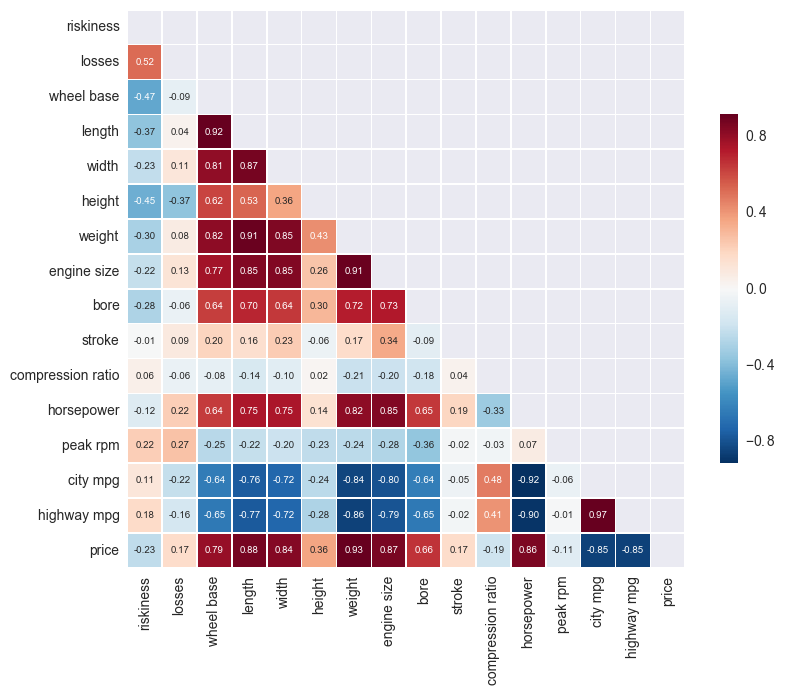

In [10]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(9)

ax = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"size":7}, fmt='3.2f')

**>** O *heatmap* mostra que há várias correlações entre as variáveis. Entretanto, é importante verificar que há correlações que são fortes pois uma característica deriva da outra. Por exemplo, as variáveis "length" e "wheel base" possuem uma correlação de **0.92**, mas isso é esperado uma vez que quanto mais longo (lenght) for o automóvel mais distante será os eixos das rodas (wheel base). Assim, as correlações que já eram esperadas são: 
-  lenght x (whell base, width, length, weight)
- Highway mpg x city mpg

**>** Estipulando um valor mínimo de **+-0.6** para que uma correlação seja considerada relevante, e considerando o mencionado acima acerca das propriedades naturalmente correlacionadas, podemos analisar as seguintes variáveis: 
- Price x (Wheel base, engine size, bore, horsepower, city mpg)
- City mpg x (wheel base, engine size, bore, horsepower)
- Horsepower x (weight, engine size, bore)
- Bore x (weight, engine size)

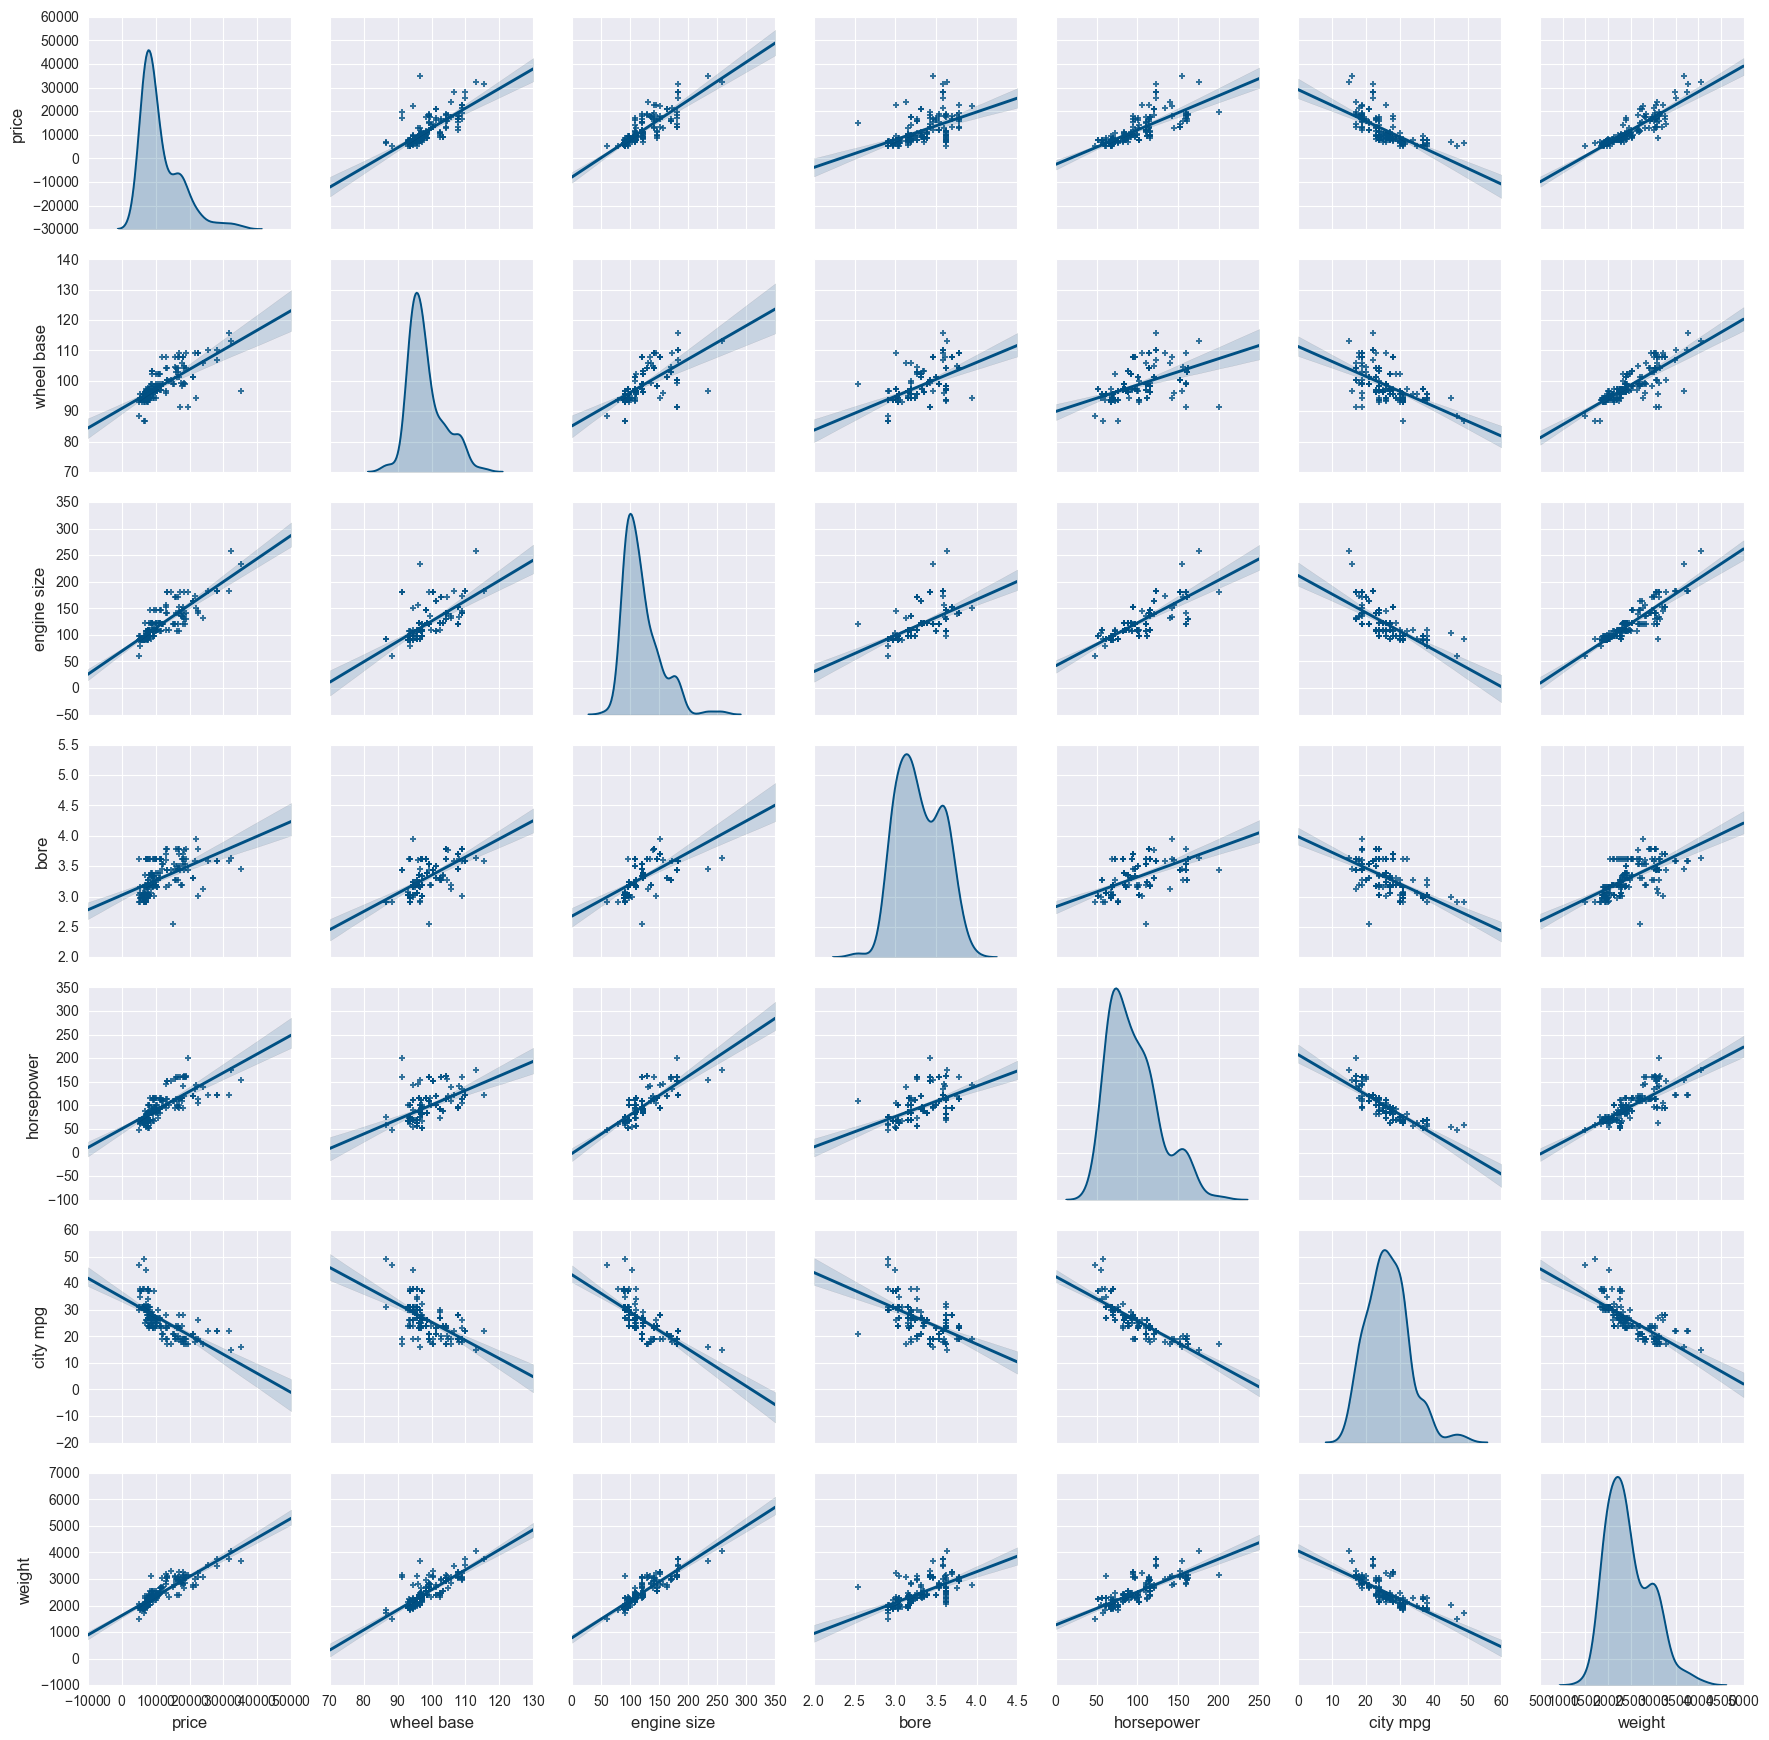

In [11]:
g = sns.pairplot(df, vars=["price", "wheel base", 'engine size', 'bore', 'horsepower','city mpg', 'weight'],
                 kind="reg", diag_kind="kde", markers="+", diag_kws=dict(shade=True))

**>** Como era de se esperar, os preços dos carros têm uma correlação possitiva com parâmetros que tendem a encarecer os produtos. É natural que carros com tamanhos, motores, cilindros e potências maiores sejam mais caros. 

**>** Ainda, é interessante notar que os carros mais econômicos/eficientes na queima de combustível não são os mais caros.

**>** A eficiência da queima de combustível depende inversamente com os parâmetros analisados, visto que carros maiores e motores mais potentes tendem a utilizar mais combustível para o perfeito funcionamento.

**> ** Carros com mais horsepower precisam de motores maiores, cilindros com maior diâmetro e, conseguentemente, são mais pesados

***
### Classificação do Risco e Desvalorização

Todas as correlações acima são referentes às características físicas e mecânicas do automovéis. Entretanto, entre as variáveis categóricas temos os parâmetros "Riskiness" e "losses", que são referentes aos riscos de contratação de seguro e da desvalorização do automovél.

Agora iremos analisar quais os parâmetros físicos/mecânicos possuem maior influência nesses dois fatores

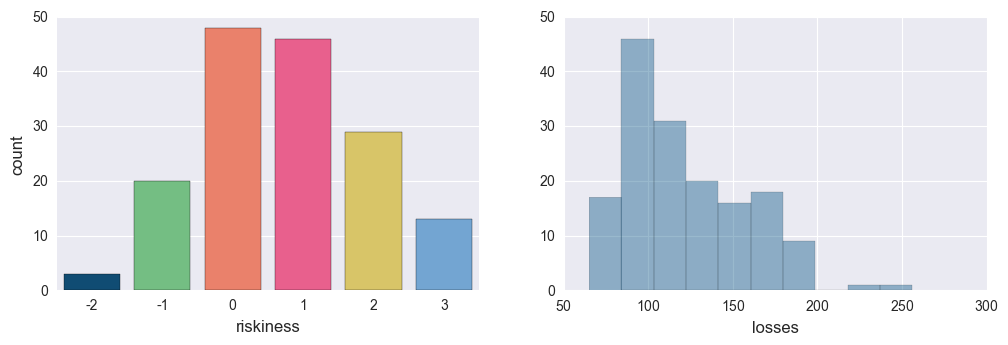

In [12]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

ax1 = plt.subplot(321)
ax1 = sns.countplot(x='riskiness',data=df)
#plt.xticks(rotation='vertical')

ax2 = plt.subplot(322)
x = df.loc[:,'losses']
ax2 = sns.distplot(x, kde=False, hist=True)
#plt.xticks(rotation='vertical')


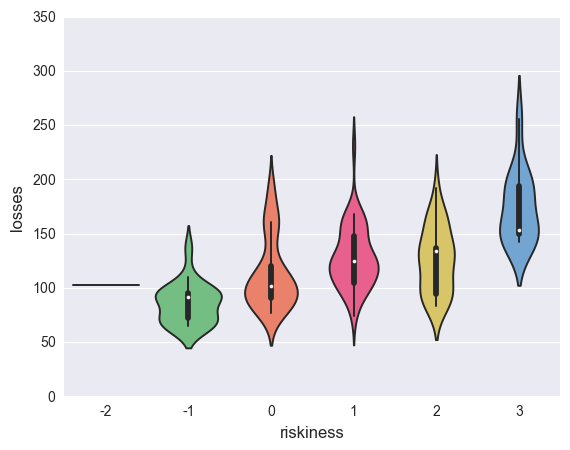

In [13]:
sns.violinplot(y='losses', x='riskiness', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

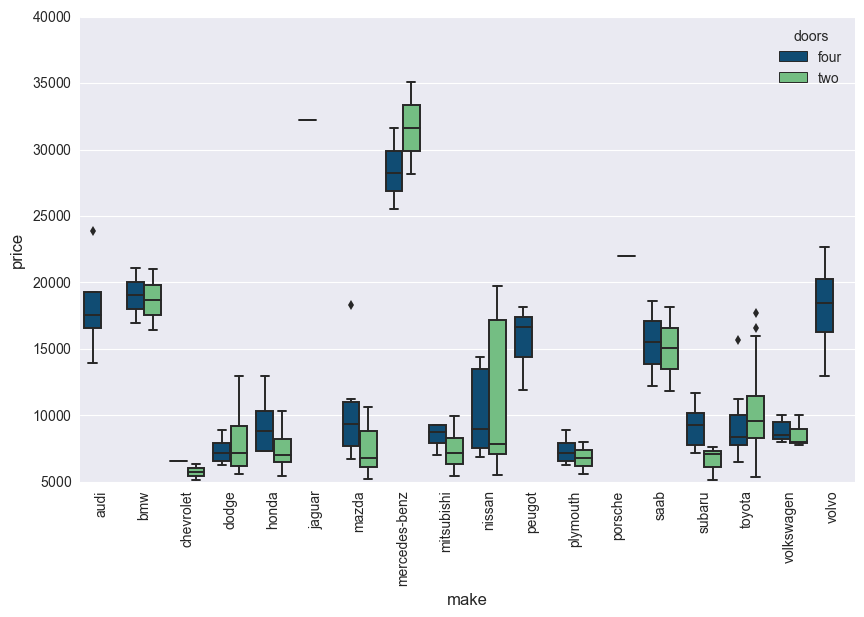

In [14]:
fig=plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
sns.boxplot(x="make", y="price", data=df, hue='doors')
plt.xticks(rotation='vertical')

In [15]:
df.describe()

,riskiness,losses,wheel base,length,width,height,weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [16]:
fim = time.time()
time_proc = fim - ini
print('')
#print(bcolors.FAIL +'-'*79+ bcolors.ENDC)
print('-------------------')
print('tempo de processamento: %fmin' %(time_proc/60))
print('-------------------')
today = datetime.datetime.now()
print('Hoje é %s/%s/%s, às %s:%s' %(today.day,today.month, today.year, today.hour, today.minute))


-------------------
tempo de processamento: 0.535319min
-------------------
Hoje é 6/5/2018, às 1:17
